In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
u1 = np.array([1,2])
u2 = np.array([2,1])
u3 = np.array([0,1.5])

z1 = 1
z2 = 1
z3 = -1

A = np.array([[z1*z1*np.inner(u1,u1), z1*z2*np.inner(u1,u2), z1*z3*np.inner(u1,u3), -z1],
              [z2*z1*np.inner(u2,u1), z2*z2*np.inner(u2,u2), z2*z3*np.inner(u2,u3), -z2],
              [z3*z1*np.inner(u3,u1), z3*z2*np.inner(u3,u2), z3*z3*np.inner(u3,u3), -z3],
              [                   z1,                    z2,                    z3,   0]])
b = np.array([1,1,1,0])

# (i) Use NumPy to invert your matrix, and to calculate the resulting values for lambda_vector and µ_vector.
rho = np.dot(np.linalg.inv(A),b.reshape(4,1))

# (ii) Check KKT conditions for lambda.
lambda_vector = rho[0:3]
miu = rho[3]
KKT_condition = np.sum(lambda_vector.reshape(1,3)*[z1, z2, z3]) < 1e-15
KKT_condition

True

In [3]:
# (iii) Calculate the optimal (nonaugmented) weight vector 𝑤∗ by using your result from Problem 1(c)(i). 
# And, find the optimal bias term 𝑤' using one of the KKT conditions from Problem 1(b).
w_star = lambda_vector[0]*z1*u1 + lambda_vector[1]*z2*u2 + lambda_vector[2]*z3*u3
w0 = 1/z1 - np.inner(w_star,u1)

# (iv) Check that the resulting 𝑤 and 𝑤' satisfy the KKT conditions on 𝑤 and 𝑤' of Pr.1(c).
# Condition 1:
lambda_vector > 0

array([[ True],
       [False],
       [ True]])

In [6]:
# Condition 1 is not satisfied at lambda2 < 0 ==> Set lambda2 = 0 we have
A_later = np.array([[z1*z1*np.inner(u1,u1),  z1*z3*np.inner(u1,u3), -z1],
              [z3*z1*np.inner(u3,u1),  z3*z3*np.inner(u3,u3), -z3],
              [                   z1,                      z3,   0]])
b_later = np.array([1,1,0])

# (i) Use NumPy to invert your matrix, and to calculate the resulting values for lambda_vector and µ_vector.
rho_later = np.dot(np.linalg.inv(A_later),b_later.reshape(3,1))
rho_later

array([[1.6],
       [1.6],
       [2.2]])

In [13]:
float(rho_later[0])

1.6000000000000008

In [14]:
# (ii) Check KKT conditions for lambda.
lambda_vector = np.array([float(rho_later[0]) , 0, float(rho_later[1])])
miu = rho_later[2]
KKT_condition = np.sum(lambda_vector.reshape(1,3)*[z1, z2, z3]) < 1e-15
KKT_condition

True

In [15]:
# (iii) Calculate the optimal (nonaugmented) weight vector 𝑤∗ by using your result from Problem 1(c)(i). 
# And, find the optimal bias term 𝑤' using one of the KKT conditions from Problem 1(b).
w_star = lambda_vector[0]*z1*u1 + lambda_vector[1]*z2*u2 + lambda_vector[2]*z3*u3
w0 = 1/z1 - np.inner(w_star,u1)
w0

-2.200000000000002

In [17]:
# (iv) Check that the resulting 𝑤 and 𝑤' satisfy the KKT conditions on 𝑤 and 𝑤' of Pr.1(c).
# Condition 1:
lambda_vector >= 0

array([ True,  True,  True])

In [22]:
# Condition 2:
lambda_vector[0]*(z1*(np.inner(w_star,u1) + w0)-1) < 1e-15   

True

In [23]:
lambda_vector[1]*(z2*(np.inner(w_star,u2) + w0)-1) < 1e-15

True

In [26]:
lambda_vector[2]*(z3*(np.inner(w_star,u3) + w0)-1) < 1e-14

True

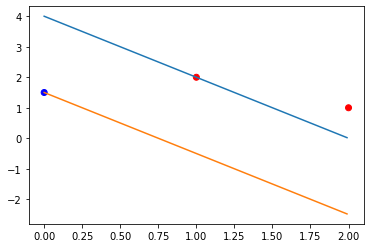

In [27]:
x = np.arange(0.0, 2.0, 0.01)
y1 = (1-w0-w_star[0]*x)/w_star[1]
y2 = (-1-w0-w_star[0]*x)/w_star[1]

plt.scatter([u1[0],u2[0],u3[0]],[u1[1],u2[1], u3[1]],c=['r','r','b'])
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()